In [4]:
import imutils
from PIL import Image, ImageEnhance
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utilities import *

N_RHO_BINS = 7
N_ANGLE_BINS = 12
N_BINS = N_RHO_BINS * N_ANGLE_BINS
BIN_SIZE = 360 // N_ANGLE_BINS
R_INNER = 5.0
R_OUTER = 35.0
K_S = np.arange(3, 8)


In [5]:
def get_cold_features(img, approx_poly_factor = 0.01):

    bw_image = threshold_image(img)

    contours, _ = cv2.findContours(bw_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    rho_bins_edges = np.log10(np.linspace(R_INNER, R_OUTER, N_RHO_BINS))
    feature_vectors = np.zeros((len(K_S), N_BINS))
    
    # print([len(cnt) for cnt in contours])
    for j, k in enumerate(K_S):
        hist = np.zeros((N_RHO_BINS, N_ANGLE_BINS))
        for cnt in contours:
            epsilon = approx_poly_factor * cv2.arcLength(cnt,True)
            cnt = cv2.approxPolyDP(cnt,epsilon,True)
            n_pixels = len(cnt)
            
            point_1s = np.array([point[0] for point in cnt])
            x1s, y1s = point_1s[:, 0], point_1s[:, 1]
            point_2s = np.array([cnt[(i + k) % n_pixels][0] for i in range(n_pixels)])
            x2s, y2s = point_2s[:, 0], point_2s[:, 1]
            
            thetas = np.degrees(np.arctan2(y2s - y1s, x2s - x1s) + np.pi)
            rhos = np.sqrt((y2s - y1s) ** 2 + (x2s - x1s) ** 2)
            rhos_log_space = np.log10(rhos)
            
            quantized_rhos = np.zeros(rhos.shape, dtype=int)
            for i in range(N_RHO_BINS):
                quantized_rhos += (rhos_log_space < rho_bins_edges[i])
                
            for i, r_bin in enumerate(quantized_rhos):
                theta_bin = int(thetas[i] // BIN_SIZE) % N_ANGLE_BINS
                hist[r_bin - 1, theta_bin] += 1
            
        normalised_hist = hist / hist.sum()
        feature_vectors[j] = normalised_hist.flatten()
        
    return feature_vectors.flatten()


In [9]:
females_A = []
for filename in os.listdir("data/Females"):
    if filename.endswith(".jpg"):
        img = cv2.imread("data/Females/" + filename)
        cold_feature = get_cold_features(img)
        females_A.append(cold_feature)
print(females_A[0])

<ipython-input-5-55c60833450c>:25: RuntimeWarning: divide by zero encountered in log10
  rhos_log_space = np.log10(rhos)


[0.00879833 0.0085668  0.00740912 0.00764066 0.00972447 0.00787219
 0.00578838 0.00717759 0.00810373 0.00486224 0.00717759 0.00810373
 0.01041908 0.01111368 0.01250289 0.00972447 0.01203982 0.00879833
 0.00810373 0.01203982 0.01180829 0.00810373 0.01203982 0.01366057
 0.00972447 0.01018754 0.00995601 0.01273443 0.01157675 0.0138921
 0.01180829 0.01088215 0.00995601 0.01250289 0.01412364 0.01018754
 0.00694605 0.01088215 0.01157675 0.00601991 0.00764066 0.01296596
 0.01597592 0.01157675 0.01111368 0.01157675 0.01111368 0.00902987
 0.00740912 0.00995601 0.00949294 0.01111368 0.01134522 0.00949294
 0.01273443 0.01574439 0.00949294 0.01203982 0.02014355 0.00740912
 0.01574439 0.01944895 0.01088215 0.0178282  0.02338504 0.01273443
 0.02130123 0.01736513 0.0131975  0.01944895 0.02338504 0.01041908
 0.01157675 0.01041908 0.0217643  0.0217643  0.01412364 0.00717759
 0.00717759 0.01597592 0.02106969 0.0171336  0.0131975  0.01157675
 0.01111368 0.0092614  0.01366057 0.01134522 0.01203982 0.00926

In [10]:
print(len(females_A[120]))

420


In [11]:
males_A = []
for filename in os.listdir("data/Females"):
    if filename.endswith(".jpg"):
        img = cv2.imread("data/Females/" + filename)
        cold_feature = get_cold_features(img)
        males_A.append(cold_feature)
print(males_A[0])

<ipython-input-5-55c60833450c>:25: RuntimeWarning: divide by zero encountered in log10
  rhos_log_space = np.log10(rhos)


[0.00879833 0.0085668  0.00740912 0.00764066 0.00972447 0.00787219
 0.00578838 0.00717759 0.00810373 0.00486224 0.00717759 0.00810373
 0.01041908 0.01111368 0.01250289 0.00972447 0.01203982 0.00879833
 0.00810373 0.01203982 0.01180829 0.00810373 0.01203982 0.01366057
 0.00972447 0.01018754 0.00995601 0.01273443 0.01157675 0.0138921
 0.01180829 0.01088215 0.00995601 0.01250289 0.01412364 0.01018754
 0.00694605 0.01088215 0.01157675 0.00601991 0.00764066 0.01296596
 0.01597592 0.01157675 0.01111368 0.01157675 0.01111368 0.00902987
 0.00740912 0.00995601 0.00949294 0.01111368 0.01134522 0.00949294
 0.01273443 0.01574439 0.00949294 0.01203982 0.02014355 0.00740912
 0.01574439 0.01944895 0.01088215 0.0178282  0.02338504 0.01273443
 0.02130123 0.01736513 0.0131975  0.01944895 0.02338504 0.01041908
 0.01157675 0.01041908 0.0217643  0.0217643  0.01412364 0.00717759
 0.00717759 0.01597592 0.02106969 0.0171336  0.0131975  0.01157675
 0.01111368 0.0092614  0.01366057 0.01134522 0.01203982 0.00926

In [12]:
import matplotlib.pyplot as pp


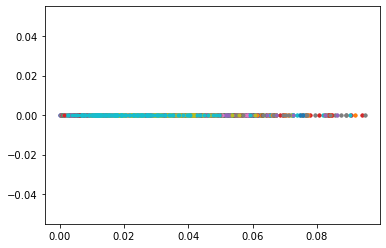

In [13]:
val = 0. # this is the value where you want the data to appear on the y-axis.
ar = males_A # just as an example array
pp.plot(ar, np.zeros_like(ar) + val, '.')
ar = females_A # just as an example array
pp.plot(ar, np.zeros_like(ar) + val, '.')

pp.show()
